<a href="https://colab.research.google.com/github/sahilkumar0707/customer_segmentation_flaskapp/blob/master/BIG_DATA_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STEP 1 : IMPORTING 

####IMPORTING THE LIBRARY

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### IMPORT DATA SET

In [35]:
path = "/content/drive/MyDrive/dataset_customer_segmentation/Train.csv"
df=pd.read_csv(path,encoding= 'unicode_escape')
#df['INDEX']=0
#df = df.set_index('INDEX')


df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## STEP 2 : DATA CLEANING

#### COUNTING NULL VALUES

In [36]:
nana = df.isna()
count = nana.sum()
count

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

#### FILLING THE NULL VALUES

In [37]:
df['Ever_Married'] = df['Ever_Married'].fillna(0)
df['Graduated'] = df['Graduated'].fillna(0)
df['Profession'] = df['Profession'].fillna('Other')
df['Work_Experience'] = df['Work_Experience'].fillna(0)
df['Family_Size'] = df['Family_Size'].fillna(1)

#### CHANGING THE FIELD NAME WITH INTEGER TO MAKE PREDICTION


In [38]:
df['Gender'] = df['Gender'].replace({'Male' : 0,'Female':1})
df['Ever_Married'] = df['Ever_Married'].replace({'Yes' : 1,'No':0})
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8,'Other':9})
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
df['Segmentation'] = df['Segmentation'].replace({'A':1,'B':2,'C':3,'D':4})
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,No,1,1.0,0,4.0,Cat_4,4
1,462643,1,1,38,Yes,3,0.0,1,3.0,Cat_4,1
2,466315,1,1,67,Yes,3,1.0,0,1.0,Cat_6,2
3,461735,0,1,67,Yes,5,0.0,2,2.0,Cat_6,2
4,462669,1,1,40,Yes,2,0.0,2,6.0,Cat_6,1
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0,22,No,9,0.0,0,7.0,Cat_1,4
8064,464685,0,0,35,No,6,3.0,0,4.0,Cat_4,4
8065,465406,1,0,33,Yes,1,1.0,0,1.0,Cat_6,4
8066,467299,1,0,27,Yes,1,1.0,0,4.0,Cat_6,2


#### VALUE COUNT IN DATA FRAME

In [39]:
df['Segmentation'].value_counts()

4    2268
1    1972
3    1970
2    1858
Name: Segmentation, dtype: int64

In [40]:
df['Segmentation'].value_counts()

4    2268
1    1972
3    1970
2    1858
Name: Segmentation, dtype: int64

#### PARAMETER OF DATAFRAME

In [41]:
df.shape

(8068, 11)

#### SUMMARY OF THE DATASET

In [42]:
df.describe()

,ID,Gender,Ever_Married,Age,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,0.452529,0.575483,43.466906,2.468518,2.370228,0.546108,2.773302,2.561973
std,2595.381232,0.497772,0.494300,16.711696,2.501989,3.325175,0.741202,1.544046,1.139029
min,458982.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,461240.750000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,463472.500000,0.000000,1.000000,40.000000,2.000000,1.000000,0.000000,2.000000,3.000000
75%,465744.250000,1.000000,1.000000,53.000000,4.000000,4.000000,1.000000,4.000000,4.000000
max,467974.000000,1.000000,1.000000,89.000000,9.000000,14.000000,2.000000,9.000000,4.000000


#### DATAFRAME FIELD TYPE

In [43]:
df.dtypes

ID                   int64
Gender               int64
Ever_Married         int64
Age                  int64
Graduated           object
Profession           int64
Work_Experience    float64
Spending_Score       int64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

#### CHECKING AGAIN FOR NULL

In [44]:
df.isnull()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8063,False,False,False,False,False,False,False,False,False,False,False
8064,False,False,False,False,False,False,False,False,False,False,False
8065,False,False,False,False,False,False,False,False,False,False,False
8066,False,False,False,False,False,False,False,False,False,False,False


#### TOTAL NUMBER OF NULL COUNTED 

In [45]:
df.isnull().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              76
Segmentation        0
dtype: int64

## STEP 3 : MACHINE LEARNING DATA PROCESSING 

### SPLITING X AND Y DATA

In [46]:
y = df['Segmentation']
y

0       4
1       1
2       2
3       2
4       1
       ..
8063    4
8064    4
8065    4
8066    2
8067    2
Name: Segmentation, Length: 8068, dtype: int64

In [47]:
dt1  = df.drop('Segmentation',axis=1)
dt2=dt1.drop('Graduated',axis=1)
dt3 = dt2.drop('ID',axis = 1)
x = dt3.drop('Var_1',axis=1)

### SPLITING DATA X_TRAIN,X_TEST,Y_TRAIN,Y_TEST

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [49]:
x_train

,Gender,Ever_Married,Age,Profession,Work_Experience,Spending_Score,Family_Size
1588,1,1,38,3,0.0,1,4.0
5503,1,0,51,0,0.0,0,1.0
4283,0,1,39,0,1.0,1,3.0
6391,0,0,28,0,4.0,0,6.0
648,1,0,25,1,1.0,0,3.0
...,...,...,...,...,...,...,...
3927,1,1,47,3,8.0,1,1.0
8039,0,1,69,6,0.0,1,4.0
5955,0,1,27,2,0.0,0,1.0
6936,1,0,27,4,0.0,0,4.0


In [50]:
x_test

,Gender,Ever_Married,Age,Profession,Work_Experience,Spending_Score,Family_Size
2090,1,0,30,1,1.0,0,2.0
7397,1,0,30,1,13.0,0,1.0
3567,1,1,29,8,0.0,2,2.0
5652,0,1,40,0,0.0,0,3.0
1749,0,1,49,0,1.0,1,4.0
...,...,...,...,...,...,...,...
1990,0,0,52,0,5.0,0,1.0
5265,1,1,61,0,0.0,1,4.0
5231,1,0,23,1,0.0,0,3.0
1590,0,1,39,1,0.0,2,3.0


In [51]:
y_train

1588    2
5503    2
4283    2
6391    2
648     2
       ..
3927    1
8039    4
5955    1
6936    4
5640    2
Name: Segmentation, Length: 6454, dtype: int64

In [52]:
y_test

2090    1
7397    4
3567    1
5652    1
1749    3
       ..
1990    2
5265    3
5231    4
1590    3
7854    2
Name: Segmentation, Length: 1614, dtype: int64

## STEP 4 : MACHINE LEARNING MODELS 

#### MODEL 1 : LINEAR REGRESSION

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
y_train_pred

array([2.5868155 , 2.42768524, 2.49877467, ..., 2.46997118, 3.02070509,
       2.67652988])

In [55]:
lr.score(x_test,y_test)

0.08903322474642994

#### MODEL 2 : DECISION TREE

In [56]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
dct.score(x_test,y_test)

0.4144981412639405

#### MODEL 3 : RANDOMFOREST CLASSIFIER

In [57]:
from sklearn.ensemble import RandomForestClassifier
list_1 = []
list_2 = []
"""
for i in range(1,1000):
  rfc = RandomForestClassifier(n_estimators=i,random_state=42 )
  rfc.fit(x_train,y_train)
  #print(f"number of tree{i}and their output {rfc.score(x_test,y_test)}")
  list_1.append(i)
  list_2.append(rfc.score(x_test,y_test)*100)
print(list_2)
plt.plot(list_1,list_2)
plt.show()
"""



'\nfor i in range(1,1000):\n  rfc = RandomForestClassifier(n_estimators=i,random_state=42 )\n  rfc.fit(x_train,y_train)\n  #print(f"number of tree{i}and their output {rfc.score(x_test,y_test)}")\n  list_1.append(i)\n  list_2.append(rfc.score(x_test,y_test)*100)\nprint(list_2)\nplt.plot(list_1,list_2)\nplt.show()\n'

In [58]:
rfc1 = RandomForestClassifier(n_estimators=200,random_state=42 )
rfc1.fit(x_train,y_train)
rfc1.score(x_test,y_test)


0.45229244114002476

#### MODEL 4 : LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression()
lsr.fit(x_train,y_train)
lsr.score(x_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.45043370508054525

#### MODEL 5 : SUPPORT VECTOR MACHINE

In [60]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred_svm = svc.predict(x_test)
svc.score(x_test,y_test)

0.4591078066914498

#### MODEL 6 : KNEIGHBORSCLASSIFIER

TO GET BEST KNEIGHBORS VALUE

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


param_grid = {'n_neighbors': range(1, 31)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(x_train, y_train)

print(grid.best_params_)

{'n_neighbors': 15}


 kneighborsclassifier


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_test,y_test)
y_pred_knn = knn.predict(x_test)
score = knn.score(x_test,y_test)
print(score)

0.966542750929368


In [63]:
y_pred_knn

array([1, 4, 1, ..., 4, 3, 2])

### STEP 4 : EXTERNAL INPUT FOR PREDICTION OF SEGMENT

In [64]:
external_input = pd.DataFrame({'Gender':[1],'Ever_Married':[1],'Age':[50],'Profession':[5],'Work_Experience':[100],'Spending_Score':[1],'Family_Size':[1]})
segment = knn.predict(external_input)
print(segment)

[4]


<ipython-input-65-50eabfadc84e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 2)
<ipython-input-65-50eabfadc84e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 2)


<function matplotlib.pyplot.show(close=None, block=None)>

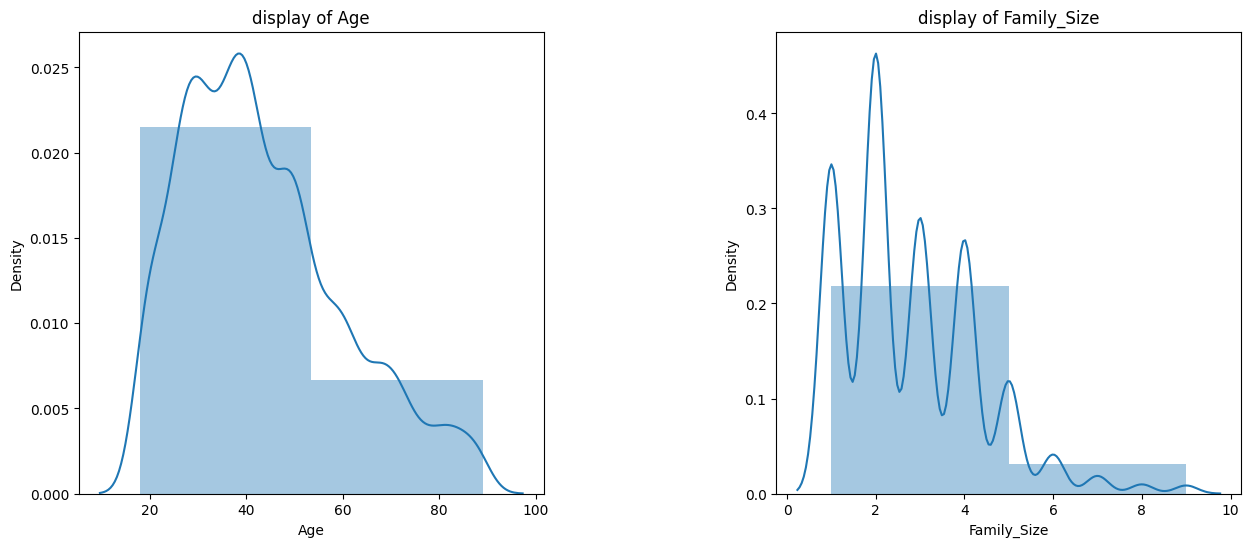

In [65]:
plt.figure(1 ,figsize= (15,6))
x = 0
for i in ['Age','Family_Size']:
  x = x+1
  plt.subplot(1,2,x)
  plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
  sns.distplot(df[i], bins = 2)
  plt.title('display of {}'.format(i))
plt.show

## STEP 5 : MODEL EXTRACT

In [67]:
import pickle as pkl
pkl.dump(knn,open('knn_model.pkl','wb'))